# Plotting with folium

__What is Folium?__

It builds on the data wrangling and a Python wrapper for leaflet.js. It makes it easy to visualize data in Python with minimal instructions.

Folium expands on the data wrangling properties utilized in Python language and the mapping characteristics of the Leaflet.js library. Folium enables us to make an intuitive map and are is visualized in a Leaflet map after manipulating data in Python. Folium results are intuitive which makes this library helpful for dashboard building and easier to work with.

Let's see the implementation of both GeoPandas and Folium:

In [1]:
# Importing Libraries
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [2]:
df1 = pd.read_csv('volcano_data_2010.csv')
df = df1.loc[:, ("Year", "Name", "Country", "Latitude", "Longitude", "Type")]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       63 non-null     int64  
 1   Name       63 non-null     object 
 2   Country    63 non-null     object 
 3   Latitude   63 non-null     float64
 4   Longitude  63 non-null     float64
 5   Type       63 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.1+ KB


In [3]:
geometry = geopandas.points_from_xy(df.Longitude, df.Latitude)
geo_df = geopandas.GeoDataFrame(df[['Year','Name','Country', 'Latitude', 'Longitude', 'Type']], geometry=geometry)

geo_df.head()

,Year,Name,Country,Latitude,Longitude,Type,geometry
0,2010,Tungurahua,Ecuador,-1.467,-78.442,Stratovolcano,POINT (-78.44200 -1.46700)
1,2010,Eyjafjallajokull,Iceland,63.630,-19.620,Stratovolcano,POINT (-19.62000 63.63000)
2,2010,Pacaya,Guatemala,14.381,-90.601,Complex volcano,POINT (-90.60100 14.38100)
3,2010,Sarigan,United States,16.708,145.780,Stratovolcano,POINT (145.78000 16.70800)
4,2010,Karangetang [Api Siau],Indonesia,2.780,125.480,Stratovolcano,POINT (125.48000 2.78000)


In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df.Type.unique()

array(['Stratovolcano', 'Complex volcano', 'Shield volcano',
       'Subglacial volcano', 'Lava dome', 'Caldera'], dtype=object)

Text(0.5, 1.0, 'Volcanoes')

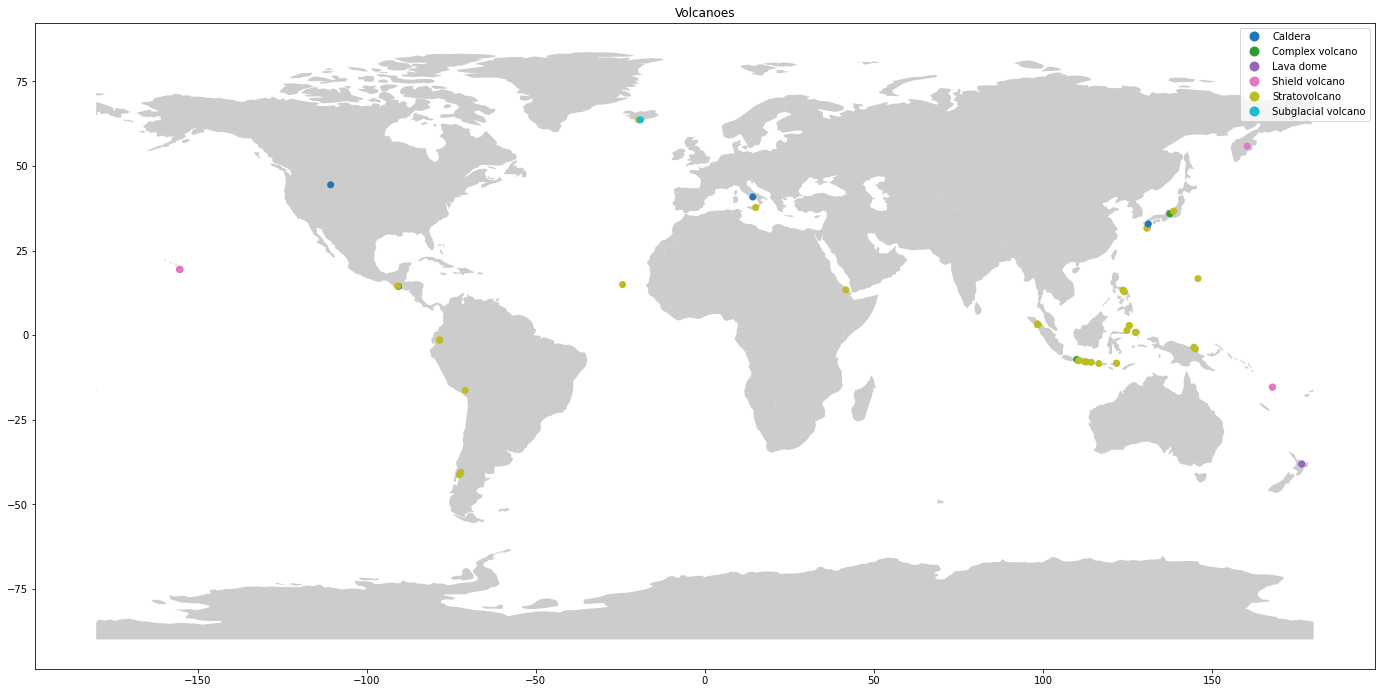

In [5]:
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')
geo_df.plot(column='Type', ax=ax, legend=True)
plt.title('Volcanoes')

We will be using different icons to differentiate the types of Volcanoes using Folium.
But before we start, we can see a few different tiles to choose from folium.

In [6]:
# Stamen Terrain
map = folium.Map(location = [13.406,80.110], tiles = "Stamen Terrain", zoom_start = 9)
map

In [7]:
# OpenStreetMap
map = folium.Map(location = [13.406,80.110], tiles='OpenStreetMap' , zoom_start = 9)
map

In [8]:
# Stamen Toner
map = folium.Map(location = [13.406,80.110], tiles='Stamen Toner', zoom_start = 9)
map

We can use other tiles for the visualization, these are just a few examples.

### Markers
Now, let's look at different volcanoes on the map using different Markers to represent the volcanoes.

In [9]:
#use terrain map layer to actually see volcano terrain
map = folium.Map(location = [4,10], tiles = "Stamen Terrain", zoom_start = 3)

In [10]:
# insert multiple markers, iterate through list
# add a different color marker associated with type of volcano

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

i = 0
for coordinates in geo_df_list:
    #assign a color marker for the type of volcano, Strato being the most common
    if geo_df.Type[i] == "Stratovolcano":
        type_color = "green"
    elif geo_df.Type[i] == "Complex volcano":
        type_color = "blue"
    elif geo_df.Type[i] == "Shield volcano":
        type_color = "orange"
    elif geo_df.Type[i] == "Lava dome":
        type_color = "pink"
    else:
        type_color = "purple"


    #now place the markers with the popup labels and data
    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            "Year: " + str(geo_df.Year[i]) + '<br>' +
                            "Name: " + str(geo_df.Name[i]) + '<br>' +
                            "Country: " + str(geo_df.Country[i]) + '<br>'
                            "Type: " + str(geo_df.Type[i]) + '<br>'
                            "Coordinates: " + str(geo_df_list[i]),
                            icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1

In [11]:
map

### Heatmaps

Folium is well known for it's heatmap which create a heatmap layer. To plot a heat map in folium, one needs a list of Latitude, Longitude.

In [12]:
# In this example, with the hep of heat maps, we are able to perceive the density of volcanoes
# which is more in some part of the world compared to others.

from folium import plugins

map = folium.Map(location = [15,30], tiles='Cartodb dark_matter', zoom_start = 2)

heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

heat_data
plugins.HeatMap(heat_data).add_to(map)

map